In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#%matplotlib notebook
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/basilhan/datasets/master/wine.data"
names =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=names)
data.shape

(178, 14)

In [3]:
data.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Choosing 3 features by random

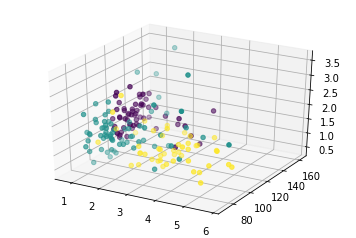

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['MalicAcid'], data['Magnesium'], data['Proanthocyanins'], c=data['Class']);

They look pretty mixed up. Let's see the result when we try to train a SVM classifier.

In [5]:
X = data[["MalicAcid", "Magnesium", "Proanthocyanins"]]
X.head()

,MalicAcid,Magnesium,Proanthocyanins
0,1.71,127,2.29
1,1.78,100,1.28
2,2.36,101,2.81
3,1.95,113,2.18
4,2.59,118,1.82


In [6]:
y = data['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
model.score(X_train, y_train)

0.73239436619718312

In [9]:
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.72222222222222221

Not so great results, huh?

### Try again with another 3 features

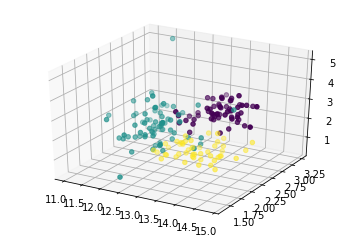

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['Alcohol'], data['Ash'], data['Flavanoids'], c=data['Class']);

Now this look like they can be separated.

In [11]:
X = data[["Alcohol", "Ash", "Flavanoids"]]
X.head()

,Alcohol,Ash,Flavanoids
0,14.23,2.43,3.06
1,13.20,2.14,2.76
2,13.16,2.67,3.24
3,14.37,2.50,3.49
4,13.24,2.87,2.69


In [12]:
y = data['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
model.score(X_train, y_train)

0.95070422535211263

In [15]:
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.88888888888888884

Much better!

### Use all features

In [16]:
X = data.drop('Class', axis=1)
X.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.99295774647887325

In [18]:
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.97222222222222221

### Performing a feature standardization

Since SVM is an algorithm that seeks to maximize the distance between data points and the separating hyperplane, distance should be comparable across all feature dimensions.

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = SVC(kernel='linear', C=1)
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)

1.0

In [20]:
X_test_scaled = scaler.transform(X_test)
y_hat = model.predict(X_test_scaled)
accuracy_score(y_test, y_hat)

1.0

In [21]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = SVC(kernel='linear', C=1)
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)

1.0

In [22]:
X_test_scaled = scaler.transform(X_test)
y_hat = model.predict(X_test_scaled)
accuracy_score(y_test, y_hat)

1.0

That really bumped up the accuracy but it looks too good. Let's try a different seed.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [24]:
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.91666666666666663

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = SVC(kernel='linear', C=1)
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)

1.0

In [26]:
X_test_scaled = scaler.transform(X_test)
y_hat = model.predict(X_test_scaled)
accuracy_score(y_test, y_hat)

0.97222222222222221

In [27]:
scaler = RobustScaler()
X_train_robustscaled = scaler.fit_transform(X_train)
model = SVC(kernel='linear', C=1)
model.fit(X_train_robustscaled, y_train)
model.score(X_train_robustscaled, y_train)

1.0

In [28]:
X_test_robustscaled = scaler.transform(X_test)
y_hat = model.predict(X_test_robustscaled)
accuracy_score(y_test, y_hat)

0.97222222222222221

So, it was the luck of the seed.

### Cross Validation

In [29]:
model = SVC(kernel='linear', C=1)
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores.mean())
print(scores.std())

0.955056179775
0.207180774321


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = SVC(kernel='linear', C=1)
model.fit(X_scaled, y)
scores = cross_val_score(model, X_scaled, y, cv=LeaveOneOut())
print(scores.mean())
print(scores.std())

0.943820224719
0.230268556538


In [31]:
scaler = RobustScaler()
X_robustscaled = scaler.fit_transform(X)
model = SVC(kernel='linear', C=1)
model.fit(X_robustscaled, y)
scores = cross_val_score(model, X_robustscaled, y, cv=LeaveOneOut())
print(scores.mean())
print(scores.std())

0.97191011236
0.165229676066


It appears that using normal standardization failed to improve performance but robust standardization does.